In [1]:
# Necessary Library
%matplotlib inline
import pandas as pd
import numpy as np
import pandas_profiling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import roc_auc_score, confusion_matrix, recall_score, precision_score
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
#load the data to dataframe
data = pd.read_csv("../input/employee-attrition/HR-Employee-Attrition.csv")

# Preprocessing

In [3]:
pandas_profiling.ProfileReport(data)

In [4]:
data.duplicated().sum()

0

In [5]:
data.drop_duplicates(inplace = True)

In [6]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [8]:
data["Attrition"].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
data["Attrition"].replace({"yes":1,"no":0}, inplace = True)

In [10]:
data["Gender"].replace({"male":1,"female":0}, inplace = True)

In [11]:
data["OverTime"].replace({"yes":1,"no":0}, inplace = True)

In [12]:
data.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StandardHours                  NaN        NaN               NaN        NaN   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EmployeeCount  EmployeeNumber  \
Age                                 NaN       -0.010145   
DailyRate                           NaN       -0.050990   
DistanceFromHome                    NaN        0.032916   
Education                           NaN        0.042070   
EmployeeCount                       NaN             NaN   
EmployeeNumber                      NaN        1.000000   
EnvironmentSatisfaction             NaN        0.017621   
HourlyRate                          NaN        0.035179   
JobInvolvement                      NaN       -0.006888   
JobLevel                            NaN       -0.018519   
JobSatisfaction                     NaN       -0.046247   
MonthlyIncome                       NaN       -0.014829   
MonthlyRate                         NaN        0.012648   
NumCompaniesWorked                  NaN       -0.001251   
PercentSalaryHike                   NaN       -0.012944   
PerformanceRating                   NaN       -0.020359   
RelationshipSatisfaction            NaN       -0.069861   
StandardHours                       NaN             NaN   
StockOptionLevel                    NaN        0.062227   
TotalWorkingYears                   NaN       -0.014365   
TrainingTimesLastYear               NaN        0.023603   
WorkLifeBalance                     NaN        0.010309   
YearsAtCompany                      NaN       -0.011240   
YearsInCurrentRole                  NaN       -0.008416   
YearsSinceLastPromotion             NaN       -0.009019   
YearsWithCurrManager                NaN       -0.009197   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Educat

In [13]:

data.drop(labels=['EmployeeCount','EmployeeNumber','StockOptionLevel','StandardHours','Over18','MonthlyIncome','JobLevel','YearsSinceLastPromotion'],axis=1,inplace=True)

In [14]:
data.corr()


Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked                       0.012594    0.022157        0.015012   
PercentSalaryHike                       -0.031701   -0.009062       -0.017205   
PerformanceRating                       -0.029548   -0.002172       -0.029071   
RelationshipSatisfaction                 0.007665    0.001330        0.034297   
TotalWorkingYears                       -0.002693   -0.002334       -0.005533   
TrainingTimesLastYear                   -0.019359   -0.008548       -0.015338   
WorkLifeBalance                          0.027627   -0.004607       -0.014617   
YearsAtCompany                           0.001458   -0.019582       -0.021355   
YearsInCurrentRole                       0.018007   -0.024106        0.008717   
YearsWithCurrManager                    -0.004999   -0.020123        0.025976   

                          JobSatisfaction  MonthlyRate  NumCompaniesWorked  \
Age                             -0.004892     0.028051            0.299635   
DailyRate                        0.030571    -0.032182            0.038153   
DistanceFromHome                -0.003669     0.027473           -0.029251   
Education                       -0.011296    -0.026084            0.126317   
EnvironmentSatisfaction         -0.006784     0.037600            0.012594   
HourlyRate                      -0.071335    -0.015297            0.022157   
JobInvolvement                  -0.021476    -0.016322            0.015012   
JobSatisfaction                  1.000000     0.000644           -0.055699   
MonthlyRate                      0.000644     1.000000            0.017521   
NumCompaniesWorked              -0.055699     0.017521            1.0

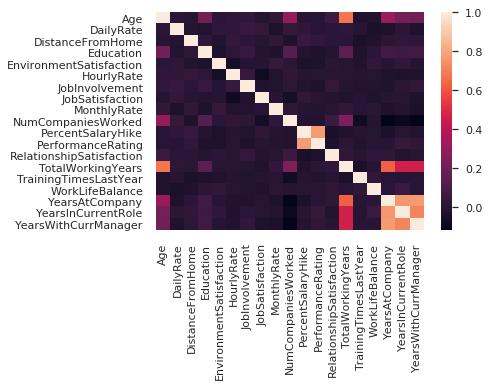

In [15]:
sns.heatmap(data.corr())

In [16]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

In [17]:
cat_col = data.select_dtypes(exclude=np.number).columns
num_col = data.select_dtypes(include=np.number).columns
print(cat_col)
print(num_col)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')


In [18]:
#One hot encoding
encoded_cat_col = pd.get_dummies(data[cat_col])
encoded_cat_col


Attrition_No  Attrition_Yes  BusinessTravel_Non-Travel  \
0                0              1                          0   
1                1              0                          0   
2                0              1                          0   
3                1              0                          0   
4                1              0                          0   
...            ...            ...                        ...   
1465             1              0                          0   
1466             1              0                          0   
1467             1              0                          0   
1468             1              0                          0   
1469             1              0                          0   

      BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                    0                             1   
1                                    1                             0   
2                                    0                             1   
3                                    1                             0   
4                                    0                             1   
...                                ...                           ...   
1465                                 1                             0   
1466                                 0                             1   
1467                                 0                             1   
1468                                 1                             0   
1469                                 0                             1   

      Department_Human Resources  Department_Research & Development  \
0                              0                                  0   
1                              0                                  1   
2                              0                                  1   
3                              0                                  1   
4                              0                                  1   
...                          ...                                ...   
1465                           0                                  1   
1466                           0                                  1   
1467                           0                                  1   
1468                           0                                  0   
1469                           0                                  1   

      Department_Sales  EducationField_Human Resources  \
0                    1                               0   
1                    0                               0   
2                    0                               0   
3                    0                               0   
4                    0                               0   
...                ...                             ...   
1465                 0                               0   
1466                 0                               0   
1467                 0                               0   
1468                 1                               0   
1469                 0                               0   

      EducationField_Life Sciences  ...  JobRole_Manufacturing Director  \
0                                1  ...                               0   
1                                1  ...                               0   
2                                0  ...                               0   
3                                1  ...                               0   
4                                0  ...                               0   
...                            ...  ...                             ...   
1465                             0  ...                               0   
1466                             0  ...                               0   
1467                             1  ...                               1   
1468                             0  ...                               0 

In [19]:
data_ready_model = pd.concat([data[num_col],encoded_cat_col], axis = 1)

In [20]:
label_encoder = LabelEncoder()
for i in cat_col:
    data[i] = label_encoder.fit_transform(data[i])

In [21]:
std_scale = StandardScaler().fit(data)
data_std = std_scale.transform(data)
minmax_scale = MinMaxScaler().fit_transform(data)

In [22]:
X = data.drop(columns="Attrition")
X.shape


(1470, 26)

In [23]:
y = data[["Attrition"]]
y.shape

(1470, 1)

In [24]:
std = StandardScaler()
X_std = std.fit_transform(X)

In [25]:
norm = MinMaxScaler()
X_norm = norm.fit_transform(X)

In [26]:
def roc_draw(X_test, y_test,logreg):
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

In [27]:
def model_fit(model, X, y, roc = False, conf = False, threshold = 0.5):
    train_X, test_X, train_y, test_y =  train_test_split(X, y, test_size = 0.3, random_state=1)
    print(np.array(np.unique(test_y, return_counts=True)).T)
    model.fit(train_X, train_y)
    train_pred = model.predict(train_X)
    print("Train Accuracy : ",accuracy_score(train_pred,train_y))
    print("Train Recall : ",recall_score(train_y, train_pred))
    print("Train Precision : ",precision_score(train_y, train_pred))
    test_pred = model.predict(test_X)
    print("Test Accuracy : ",accuracy_score(test_pred,test_y))
    print("Test Recall : ",recall_score(test_y,test_pred))
    print("Test Precision : ",precision_score(test_y,test_pred))
    if roc:
        roc_draw(test_X, test_y, model)
    if conf:
        print("Test Data Confusion Matrix")
        print(confusion_matrix(test_pred,test_y))
    print("After Tuning Threshold")
    test_pred_prob = model.predict_proba(test_X)
    predict_threshold_test = np.where(test_pred_prob[:,1]>threshold,1,0)
    print("Test Accuracy : ",accuracy_score(predict_threshold_test,test_y))
    print("Test Recall : ",recall_score(test_y, predict_threshold_test))
    print("Test Precision : ",precision_score(test_y, predict_threshold_test))
    if conf:
        print("Test Data Confusion Matrix")
        print(confusion_matrix(predict_threshold_test,test_y))
        print(classification_report(test_y, predict_threshold_test))
    return model.predict_proba(train_X), model.predict_proba(test_X)

[[  0 364]
 [  1  77]]
Train Accuracy :  0.8775510204081632
Train Recall :  0.28125
Train Precision :  0.8035714285714286
Test Accuracy :  0.854875283446712
Test Recall :  0.2727272727272727
Test Precision :  0.7241379310344828


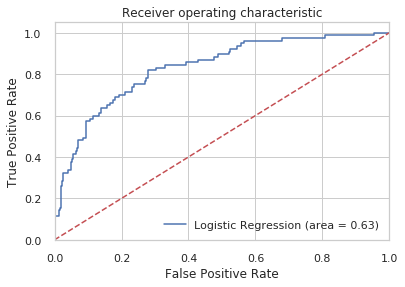

Test Data Confusion Matrix
[[356  56]
 [  8  21]]
After Tuning Threshold
Test Accuracy :  0.8458049886621315
Test Recall :  0.5714285714285714
Test Precision :  0.5569620253164557
Test Data Confusion Matrix
[[329  33]
 [ 35  44]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       364
           1       0.56      0.57      0.56        77

    accuracy                           0.85       441
   macro avg       0.73      0.74      0.74       441
weighted avg       0.85      0.85      0.85       441



In [28]:
logistic = LogisticRegression()
train_pred_prob, test_pred_prob = model_fit(logistic, X, y, roc = True, conf = True, threshold=0.3)

In [29]:
predict_threshold_test = np.where(test_pred_prob[:,1]>0.7,1,0)

In [30]:
np.where(logistic.predict_proba(X)[:,1]>0.5,1,0)

array([1, 0, 0, ..., 0, 0, 0])

In [31]:
logistic.predict_proba(X)

array([[0.32173079, 0.67826921],
       [0.97027765, 0.02972235],
       [0.59645438, 0.40354562],
       ...,
       [0.53941608, 0.46058392],
       [0.97989222, 0.02010778],
       [0.93152378, 0.06847622]])

In [32]:
model_fit(logistic, X_std, y)

[[  0 364]
 [  1  77]]
Train Accuracy :  0.8756073858114675
Train Recall :  0.3125
Train Precision :  0.7352941176470589
Test Accuracy :  0.8526077097505669
Test Recall :  0.2987012987012987
Test Precision :  0.6764705882352942
After Tuning Threshold
Test Accuracy :  0.8526077097505669
Test Recall :  0.2987012987012987
Test Precision :  0.6764705882352942


(array([[0.92033505, 0.07966495],
        [0.91716556, 0.08283444],
        [0.85465746, 0.14534254],
        ...,
        [0.84766884, 0.15233116],
        [0.95271513, 0.04728487],
        [0.89969419, 0.10030581]]), array([[0.81852625, 0.18147375],
        [0.44075571, 0.55924429],
        [0.2632653 , 0.7367347 ],
        [0.75716408, 0.24283592],
        [0.94158661, 0.05841339],
        [0.97265917, 0.02734083],
        [0.82349155, 0.17650845],
        [0.90483826, 0.09516174],
        [0.83160416, 0.16839584],
        [0.95916399, 0.04083601],
        [0.99837672, 0.00162328],
        [0.82659313, 0.17340687],
        [0.69882673, 0.30117327],
        [0.92491642, 0.07508358],
        [0.86360359, 0.13639641],
        [0.96769231, 0.03230769],
        [0.98621701, 0.01378299],
        [0.66675962, 0.33324038],
        [0.79285387, 0.20714613],
        [0.93827775, 0.06172225],
        [0.87189544, 0.12810456],
        [0.84492774, 0.15507226],
        [0.97900576, 0.02099424],


In [33]:
model_fit(logistic, X_norm, y)

[[  0 364]
 [  1  77]]
Train Accuracy :  0.8707482993197279
Train Recall :  0.23125
Train Precision :  0.7872340425531915
Test Accuracy :  0.854875283446712
Test Recall :  0.23376623376623376
Test Precision :  0.782608695652174
After Tuning Threshold
Test Accuracy :  0.854875283446712
Test Recall :  0.23376623376623376
Test Precision :  0.782608695652174


(array([[0.89127241, 0.10872759],
        [0.93960001, 0.06039999],
        [0.92764568, 0.07235432],
        ...,
        [0.89730292, 0.10269708],
        [0.94898205, 0.05101795],
        [0.89848675, 0.10151325]]), array([[0.83091685, 0.16908315],
        [0.47533009, 0.52466991],
        [0.35859708, 0.64140292],
        [0.77658743, 0.22341257],
        [0.91434866, 0.08565134],
        [0.96672695, 0.03327305],
        [0.85338915, 0.14661085],
        [0.91125536, 0.08874464],
        [0.84401641, 0.15598359],
        [0.93839849, 0.06160151],
        [0.99311636, 0.00688364],
        [0.77533853, 0.22466147],
        [0.7056605 , 0.2943395 ],
        [0.91246176, 0.08753824],
        [0.86227381, 0.13772619],
        [0.97224893, 0.02775107],
        [0.98382614, 0.01617386],
        [0.70840813, 0.29159187],
        [0.83008369, 0.16991631],
        [0.93162549, 0.06837451],
        [0.86241759, 0.13758241],
        [0.85639104, 0.14360896],
        [0.97337863, 0.02662137],
